In [19]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import us
from pathlib import Path
from datetime import datetime

(to find the full names of the states for shd_df, I had to import "us". To do this, type "pip install us" on a random cell, once installed, delete and then restart kernel to use)

# Data Cleaning
### Preparing for Analysis

In [20]:
CSV1Kpath = Path("Kaggle1DS copy.csv")
CSV2Kpath = Path("Kaggle2DS copy.csv")
CSV3Xpath = Path("SHD copy.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [21]:
#Data frames
kaggle_1_df = pd.DataFrame(CSV1KR)
kaggle_2_df = pd.DataFrame(CSV2KR)
shd_df = pd.DataFrame(CSV3XR)

### Cleaning Kaggle 1 df

In [22]:
#kaggle_1_df

In [23]:
# Organizing columns in desired order #update: took out address
clean_1_df = pd.DataFrame(kaggle_1_df[["school","type","year","date","time","city","state","urbanrural","race","killed","injured","victims","LONCOD","LATCOD"]])

# Convert "Date" column to datetime
clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])

# Format the 'Date' column for display
clean_1_df["date"] = clean_1_df["date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_1_df.rename(columns={"urbanrural": "City Type", "LONCOD": "Longitude","LATCOD": "Latitude"}, inplace=True)

# Proper case the columns
clean_1_df.columns = [col.title() if col.islower() else col for col in clean_1_df]

# Proper case the rows
clean_1_df = clean_1_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Replace NaN with "Unknown"
clean_1_df = clean_1_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_1_path = Path("clean 1.csv")
clean_1_df.to_csv(clean_1_path, index=False)

clean_1_df

/var/folders/gx/940qgss5321_lvwt8pt67nbh0000gn/T/ipykernel_3825/1636499300.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_1_df["date"] = pd.to_datetime(clean_1_df["date"])


,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,William Penn High School,High School,2009,01/08/2009,8:30Pm,New Castle,Delaware,Suburbtown,Black,0,1,1,-75.5849,39.6681
1,Dunbar Vocational Career Academy,High School,2009,01/09/2009,8:00Pm,Chicago,Illinois,Urban,Black,0,5,5,-87.6175,41.8399
2,Cahokia High School,High School,2009,01/23/2009,7:20Pm,Cahokia,Illinois,Suburbtown,Black,1,0,1,-90.1651,38.5657
3,Zebulon Middle School,Middle School,2009,02/11/2009,6:00Am,Zebulon,North Carolina,Suburbtown,Black,0,1,1,-78.3118,35.8315
4,Central High School,High School,2009,02/17/2009,2:20Pm,Detroit,Michigan,Urban,Unknown,0,1,1,-83.113977,42.383593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Denali Elementary School,Elementary School,2018,10/03/2018,9:30Am,Anchorage,Alaska,Urban,White,0,1,1,-149.881113,61.213281
176,Varina High School,High School,2018,10/07/2018,9:30Pm,Henrico,Virginia,Rural,Black,0,1,1,-77.378427,37.471892
177,Butler High School,High School,2018,10/29/2018,7:15Am,Matthews,North Carolina,Suburbtown,White,1,0,1,-80.691593,35.120282
178,Simonsdale Elementary School,Elementary School,2018,11/20/2018,4:00Pm,Portsmouth,Virginia,Urban,White,0,1,1,-76.382449,36.826811


### Cleaning Kaggle 2 df

In [24]:
#kaggle_2_df

In [25]:
# Organizing available columns in desired order
clean_2_df = pd.DataFrame(kaggle_2_df[["school","year","date","time","city","state","killed","injured","long","lat"]])

# Convert "Date" column to datetime
clean_2_df["date"] = pd.to_datetime(clean_2_df["date"])

# Format the 'Date' column for display
clean_2_df["date"] = clean_2_df["date"].dt.strftime("%m/%d/%Y")

# Renaming the columns
clean_2_df.rename(columns={"long": "Longitude","lat": "Latitude"}, inplace=True)

# Proper case the columns
clean_2_df.columns = [col.title() if col.islower() else col for col in clean_2_df]

# Proper case the rows
clean_2_df = clean_2_df.map(lambda x: x.title() if isinstance(x, str) else x)

# Adding empty columns that match first dataframe
clean_2_df["Type"] = "Unknown"
clean_2_df["City Type"] = "Unknown"
clean_2_df["Race"] = "Unknown"
clean_2_df["Victims"] = "Unknown"

# Extract school type from the 'School' column and put it in the 'Type' column
clean_2_df.loc[clean_2_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_2_df.loc[clean_2_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_2_df.loc[clean_2_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_2_df.loc[clean_2_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"


# Rearranging new columns and the first dataframe into desired order
clean_2_df = pd.DataFrame(clean_2_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed","Injured","Victims","Longitude","Latitude"]])

# Replace NaN with "Unknown"
clean_2_df = clean_2_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_2_path = Path("clean 2.csv")
clean_2_df.to_csv(clean_2_path, index=False)

clean_2_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,Columbine High School,High School,1999,04/20/1999,11:19 Am,Littleton,Colorado,Unknown,Unknown,13,21,Unknown,-105.075,39.60391
1,Scotlandville Middle School,Middle School,1999,04/22/1999,12:30 Pm,Baton Rouge,Louisiana,Unknown,Unknown,0,1,Unknown,-91.169966,30.529958
2,Heritage High School,High School,1999,05/20/1999,8:03 Am,Conyers,Georgia,Unknown,Unknown,0,6,Unknown,-84.04796,33.626922
3,John Bartram High School,High School,1999,10/04/1999,10:00 Am,Philadelphia,Pennsylvania,Unknown,Unknown,0,1,Unknown,-75.234108,39.921509
4,Dorchester High School,High School,1999,11/03/1999,7:40 Am,Boston,Massachusetts,Unknown,Unknown,0,1,Unknown,-71.075901,42.285268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,E. Washington Rhodes Elementary School,Elementary School,2023,05/08/2023,11:30 Am,Philadelphia,Pennsylvania,Unknown,Unknown,0,0,Unknown,-75.1781,40.0028
383,Roosevelt High School,High School,2023,05/17/2023,2:25 Pm,Washington,District Of Columbia,Unknown,Unknown,1,0,Unknown,-77.029177,38.942971
384,St. John'S Prep,Unknown,2023,05/22/2023,Unknown,Danvers,Massachusetts,Unknown,Unknown,0,0,Unknown,-70.952603,42.582682
385,Oliver Citywide Academy,Unknown,2023,05/24/2023,7:30 Am,Pittsburgh,Pennsylvania,Unknown,Unknown,1,0,Unknown,-80.024121,40.464327


### Cleaning shd_df

In [26]:
#shd_df

In [27]:
# Organizing available columns in desired order
clean_3_df = pd.DataFrame(shd_df[["School","School_Level","Date","City","State","First Shot"]])

# Convert "Date" column to datetime
clean_3_df["Date"] = pd.to_datetime(clean_3_df["Date"])

# Create the "Year" column by extracting the year from the "Date" column
clean_3_df['Year'] = clean_3_df['Date'].dt.year

# Format the 'Date' column for display
clean_3_df["Date"] = clean_3_df["Date"].dt.strftime('%m/%d/%Y')

# Renaming the columns
clean_3_df.rename(columns={"School_Level": "Type","First Shot": "Time"}, inplace=True)

# Proper case the columns
clean_3_df.columns = [col.title() if col.islower() else col for col in clean_3_df]

# Adding empty columns that match first dataframe
clean_3_df["City Type"] = ""
clean_3_df["Race"] = "Unknown"
clean_3_df["Killed"] = "Unknown"
clean_3_df["Injured"] = "Unknown"
clean_3_df["Victims"] = "Unknown"
clean_3_df["Longitude"] = ""
clean_3_df["Latitude"] = ""

# Extract school type from the 'School' column and put it in the 'Type' column
clean_3_df.loc[clean_3_df["School"].str.contains("High School", case=False, na=False), "Type"] = "High School"
clean_3_df.loc[clean_3_df["School"].str.contains("Middle School", case=False, na=False), "Type"] = "Middle School"
clean_3_df.loc[clean_3_df["School"].str.contains("Elementary School", case=False, na=False), "Type"] = "Elementary School"
clean_3_df.loc[clean_3_df["School"].str.contains("Junior High", case=False, na=False), "Type"] = "Middle School"

# Map state abbreviations to full state names using us package
def get_full_state_name(abbrev):
    try:
        return us.states.lookup(abbrev).name
    except AttributeError:
        return abbrev

clean_3_df["State"] = clean_3_df["State"].apply(get_full_state_name)

# Rearranging new columns and the first dataframe into desired order
clean_3_df = pd.DataFrame(clean_3_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed","Injured","Victims","Longitude","Latitude"]])

# Replace NaN with "Unknown"
clean_3_df = clean_3_df.fillna("Unknown")

# Adding the newly labeled data into a new csv for cleanliness
clean_3_path = Path("clean 3.csv")
clean_3_df.to_csv(clean_3_path, index=False)

clean_3_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,Hine Junior High School,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
1,Sousa Junior High,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
2,Unnamed High School,High School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
3,John F. Kennedy High School,High School,1970,02/06/1970,Unknown,Cleveland,Ohio,,Unknown,Unknown,Unknown,Unknown,,
4,David Starr Jordan High School,High School,1970,03/23/1970,Unknown,Long Beach,California,,Unknown,Unknown,Unknown,Unknown,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Little Rock School District Bus,Other,2022,06/08/2022,16:01:00,Little Rock,Arkansas,,Unknown,Unknown,Unknown,Unknown,,
2065,Walnut Park Elementary School,Elementary School,2022,06/09/2022,09:30:00,Gadsden,Alabama,,Unknown,Unknown,Unknown,Unknown,,
2066,Byhalia High School,High School,2022,06/10/2022,10:30:00,Byhalia,Mississippi,,Unknown,Unknown,Unknown,Unknown,,
2067,Mariner High School,High School,2022,06/13/2022,15:10:00,Everett,Washington,,Unknown,Unknown,Unknown,Unknown,,


### Merging Data Frames

In [79]:
# Merging dfs
merged_df = pd.merge(clean_1_df, clean_2_df, on=["School","Type","Year","Date","Time","City","State","City Type","Race","Killed","Injured","Longitude","Latitude"], how="right") 
final_df = pd.merge(merged_df, clean_3_df, on=["School","Type","Year","Date","Time","City","State","City Type","Race","Longitude","Latitude"], how="right")

# Selecting only the desired columns
final_df = final_df[["School","Type","Year","Date","Time","City","State","City Type","Race","Killed_y","Injured_y","Victims","Longitude","Latitude"]]

# Renaming the columns
final_df.rename(columns={"Killed_y": "Killed","Injured_y":"Injured"}, inplace=True)

final_df

,School,Type,Year,Date,Time,City,State,City Type,Race,Killed,Injured,Victims,Longitude,Latitude
0,Hine Junior High School,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
1,Sousa Junior High,Middle School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
2,Unnamed High School,High School,1970,01/05/1970,Unknown,Washington,DC,,Unknown,Unknown,Unknown,Unknown,,
3,John F. Kennedy High School,High School,1970,02/06/1970,Unknown,Cleveland,Ohio,,Unknown,Unknown,Unknown,Unknown,,
4,David Starr Jordan High School,High School,1970,03/23/1970,Unknown,Long Beach,California,,Unknown,Unknown,Unknown,Unknown,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,Little Rock School District Bus,Other,2022,06/08/2022,16:01:00,Little Rock,Arkansas,,Unknown,Unknown,Unknown,Unknown,,
2065,Walnut Park Elementary School,Elementary School,2022,06/09/2022,09:30:00,Gadsden,Alabama,,Unknown,Unknown,Unknown,Unknown,,
2066,Byhalia High School,High School,2022,06/10/2022,10:30:00,Byhalia,Mississippi,,Unknown,Unknown,Unknown,Unknown,,
2067,Mariner High School,High School,2022,06/13/2022,15:10:00,Everett,Washington,,Unknown,Unknown,Unknown,Unknown,,


# Analyzing the Data

In [81]:
# Annual analysis of # of incidents by year
year_school_df = final_df.groupby("Year")

#Count of incidents per year
count_year_incident = year_school_df['Year'].count()

count_year_incident

Year
1970     20
1971     21
1972     18
1973     18
1974     16
1975     14
1976     11
1977     16
1978     16
1979     16
1980     20
1981     17
1982     18
1983     25
1984     25
1985     20
1986     16
1987     25
1988     38
1989     19
1990     18
1991     32
1992     33
1993     47
1994     39
1995     22
1996     21
1997     26
1998     28
1999     22
2000     29
2001     25
2002     19
2003     32
2004     35
2005     47
2006     59
2007     44
2008     35
2009     31
2010     15
2011     16
2012     20
2013     34
2014     46
2015     40
2016     50
2017     58
2018    118
2019    119
2020    114
2021    251
2022    155
Name: Year, dtype: int64

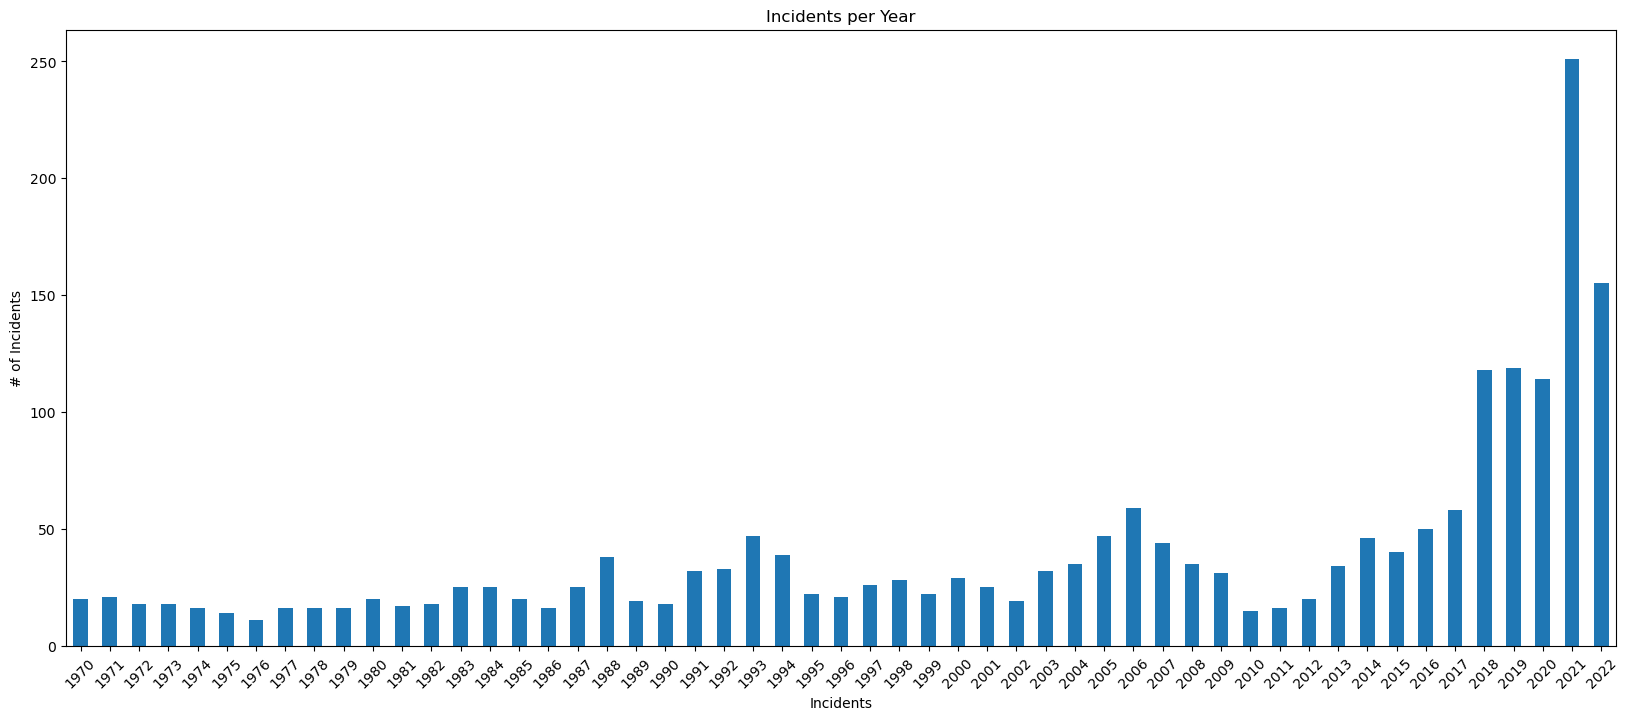

In [99]:
# Create a bar chart
annual_chart = count_year_incident.plot(kind="bar", figsize=(20,8))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Incidents")
plt.ylabel("# of Incidents")
plt.title("Incidents per Year")

plt.show()